In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns

2024-01-09 14:09:26.847297: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-09 14:09:26.854872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:09:26.927626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 14:09:26.927859: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 14:09:26.927932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
Y_train=y_train.copy()
Y_test=y_test.copy()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
for i in range(2,10):
    print(X_train[0][i],'\n')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0] 

[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0] 

[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0] 

[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0] 

[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
   0   0   0   0   0   0   0   0   0   0] 



In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

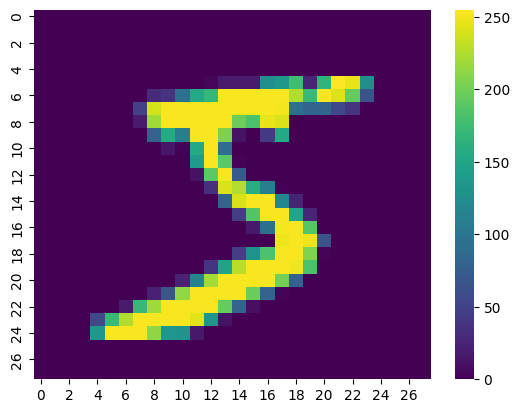

In [7]:
sns.heatmap(X_train[0], cmap='viridis')

In [8]:
Y_train[0]

5

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train_flattened=X_train.reshape(-1,28*28)
X_test_flattened=X_test.reshape(-1,28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model=keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
    ]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


2024-01-09 14:09:40.166793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-01-09 14:09:40.167092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pop-os
2024-01-09 14:09:40.167104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pop-os
2024-01-09 14:09:40.168556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2024-01-09 14:09:40.168724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2024-01-09 14:09:40.168738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


In [13]:
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4659 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2669 - accuracy: 0.9255


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.9251


[0.2680993676185608, 0.9251000285148621]

In [16]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.9153625e-02, 3.1416934e-07, 5.6780666e-02, 9.4981635e-01,
       1.9864617e-03, 9.3728781e-02, 1.0316299e-06, 9.9978334e-01,
       8.3951682e-02, 6.1823571e-01], dtype=float32)

In [19]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

In [21]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)


Text(45.722222222222214, 0.5, 'Truth')

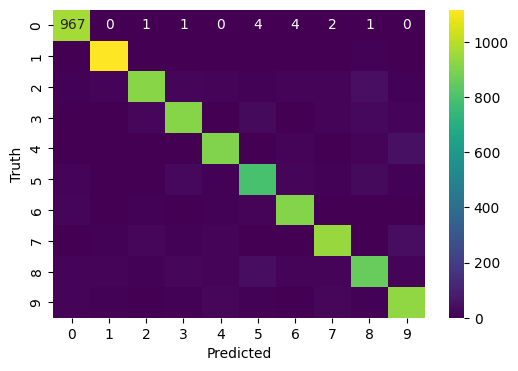

In [25]:
plt.figure(figsize = (6,4))
sns.heatmap(cm, cmap='viridis',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
mdl=keras.Sequential(
    [
       keras.layers.Dense(100,input_shape=(784,),activation='relu'),
       keras.layers.Dense(10,activation='sigmoid') 
    ]
)

mdl.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
mdl.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 67s 34ms/step - loss: 0.2749 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1287 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0902 - accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0688 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0548 - accuracy: 0.9827


In [30]:
mdl.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0844 - accuracy: 0.9754


[0.08440828323364258, 0.9753999710083008]